In [ ]:
# 합성곱 신경망을 이용한 이미지 분류
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 마지막에 1을 넣은 이유는 도장을 찍으려면 항상 깊이가 있어야 하기 때문이다!
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential()
# 합성곱 층인 Conv2D를 추가한다.
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same',input_shape=(28,28,1)))

# 풀링층을 추가한다.
model.add(keras.layers.MaxPooling2D(2))

# 여기까지 설명: 일단 Conv2D 합성곱층에서 세임패딩을 사용해서 출력과 입력 형태가 같다.
# 이후 풀링층에서 2라고 썼으니 14x14 로 변하고, 커널 종류를 32개를 썼으니 최종 형태는
# (n, 14,14,32) 이 된다!!

# 합성곱 층인 Conv2D를 추가한다.
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',padding='same',input_shape=(28,28,1)))

# 풀링층을 추가한다.
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

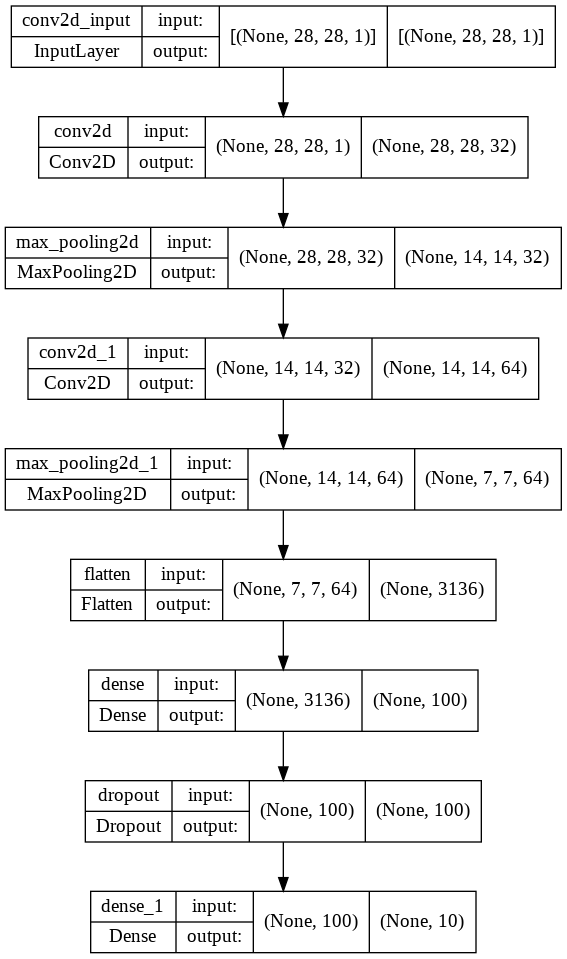

In [ ]:
# 케라스는 서머리 말고 층의 구성을 그림으로 표현해 주는 plot_model() 함수를 keras.utils객체에서 제공
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 17s 4ms/step - loss: 0.5103 - accuracy: 0.8181 - val_loss: 0.3403 - val_accuracy: 0.8757
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3406 - accuracy: 0.8788 - val_loss: 0.2807 - val_accuracy: 0.8966
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2890 - accuracy: 0.8957 - val_loss: 0.2452 - val_accuracy: 0.9118
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2573 - accuracy: 0.9065 - val_loss: 0.2440 - val_accuracy: 0.9097
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2327 - accuracy: 0.9141 - val_loss: 0.2286 - val_accuracy: 0.9194
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2132 - accuracy: 0.9223 - val_loss: 0.2235 - val_accuracy: 0.9169
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1917 - accuracy: 0.9302 - val_loss: 0.2220 - val_accuracy

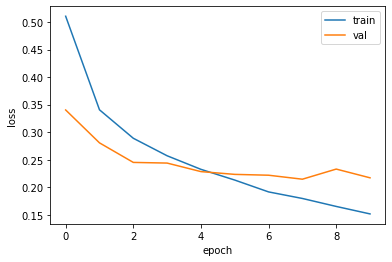

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 보면 9번째 훈련이 가장 결과가 좋다.

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2148 - accuracy: 0.9232


[0.21478047966957092, 0.9231666922569275]

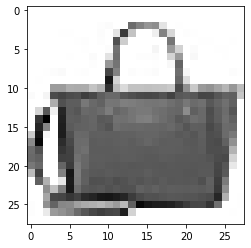

[[2.2387523e-17 6.3179756e-23 6.5152049e-21 2.2787986e-19 7.6339801e-20
  2.0652291e-18 2.5506759e-17 8.0653167e-17 1.0000000e+00 8.9136379e-18]]


In [ ]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

# 여기서 슬라이싱을 굳이 사용한 이유는
# fit, predict, evaluate 메서드는 무조건 첫 차원으로 배치차원을 요구하기 때문이다.
preds=model.predict(val_scaled[0:1])
print(preds)

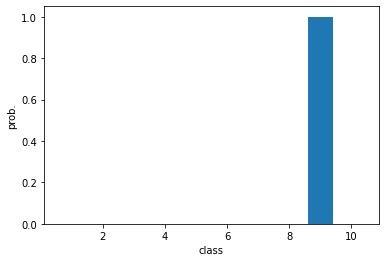

In [ ]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

# 이거 뭐 argmax로 가장 예측에 근접한 레이블 자동출력 함수도 만드는데
# 귀찮아서 안함 알아서 하자.

In [ ]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled, test_target)
# 실전에 투입하면 91%의 성능을 기대할 수 있군!

313/313 [==============================] - 1s 3ms/step - loss: 0.2451 - accuracy: 0.9134


[0.2450786679983139, 0.9133999943733215]